# **1IADT - Tech Challenge - Fase 1**
**Luiz Carvalho**

---
## **O Problema**
Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

A base de dados para este desafio é a **seguro_saude.csv** na pasta **Base de Dados**.

## **Tarefas**

### **Exploração de dados:**
- Carregue a base de dados e explore suas características.
- Analise estatísticas descritivas e visualize distribuições relevantes.

### **Pré-processamento de dados:**
- Realize a limpeza dos dados, tratando valores ausentes (se necessário).
- Converta variáveis categóricas em formatos adequados para modelagem.

### **Modelagem:**
- Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo, Regressão Linear, Árvore de Decisão, etc...).
- Divida o conjunto de dados em conjuntos de treinamento e teste.

### **Treinamento e avaliação do modelo:**
- Treine o modelo com conjunto de treinamento.

### **Validação estatística:**
- Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).
---

### **Instalando as bibliotecas necessárias.**

In [1]:
# !python -m pip install pandas
# !python -m pip install matplotlib
# !python -m pip install seaborn
# !python -m pip install scikit-learn
# !python -m pip install xgboost
# !python -m pip install numpy

### **Importando as bibliotecas necessárias.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

### **Exploração de dados.**

**Lendo o arquivo de entrada.**

In [3]:
caminho_arquivo = '../Base de Dados/seguro_saude.csv'

pd.set_option('display.max_columns', None)

seguro_saude_df = pd.read_csv(caminho_arquivo)

**Observações preliminares.**

In [4]:
seguro_saude_df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,feminino,27.9,0,sim,sudoeste,16884.92
1,18,masculino,33.8,1,não,sudeste,1725.55
2,28,masculino,33.0,3,não,sudeste,4449.46
3,33,masculino,22.7,0,não,noroeste,21984.47
4,32,masculino,28.9,0,não,noroeste,3866.86


In [5]:
seguro_saude_df.tail()

,idade,gênero,imc,filhos,fumante,região,encargos
1333,50,masculino,31.0,3,não,noroeste,10600.55
1334,18,feminino,31.9,0,não,nordeste,2205.98
1335,18,feminino,36.9,0,não,sudeste,1629.83
1336,21,feminino,25.8,0,não,sudoeste,2007.95
1337,61,feminino,29.1,0,sim,noroeste,29141.36


In [6]:
seguro_saude_df.shape

(1338, 7)

In [7]:
seguro_saude_df.describe()

,idade,imc,filhos,encargos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
seguro_saude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   gênero    1338 non-null   object 
 2   imc       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumante   1338 non-null   object 
 5   região    1338 non-null   object 
 6   encargos  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
seguro_saude_df.isnull().sum()

idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64

Através das observações preliminares é possível validar que o dataset possue 1338 linhas e 7 colunas, destas 7 colunas 4 são númericas e 3 são categóricas e o dataset não possui valores faltantes ou nulos.

Das colunas númericas é possível verificar que as pessoas possuem de 18 a 64 anos, um imc de 16 a 53, e na faixa de 1 a 5 filhos.

**Colunas numéricas**

In [10]:
# Listando as colunas númericas
colunas_numericas = seguro_saude_df.select_dtypes(exclude=['object'])
colunas_numericas.columns

Index(['idade', 'imc', 'filhos', 'encargos'], dtype='object')

In [11]:
# Quantidade de colunas númericas
len(colunas_numericas.columns)

4

Através da validação acima confirmamos que as colunas númericas realmente são 4, sendo as seguintes:
- idade
- imc
- filhos
- encargos

As colunas númericas possuem as seguintes características gerais:

In [12]:
colunas_numericas.describe().round(2)

,idade,imc,filhos,encargos
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.67,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,16.00,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.70,2.00,16639.92
max,64.00,53.10,5.00,63770.43


**Colunas categóricas**

In [13]:
colunas_categoricas = seguro_saude_df.select_dtypes(include=['object'])
colunas_categoricas.columns

Index(['gênero', 'fumante', 'região'], dtype='object')

In [14]:
len(colunas_categoricas.columns)

3

Através da validação acima também confirmamos que as colunas categóricas são 3, sendo as seguintes:
- gênero
- fumante
- região

Pela separação das colunas númericas e categóricas vimos que não temos nenhuma coluna que foi separado de forma errada, ou seja, que deveria ser númerica e foi como categórica ou vice-versa.

Com isso ficamos com a seguinte separação:

Coluna Númerica
- idade
- imc
- filhos
- encargos

Coluna Categórica
- gênero
- fumante
- região

**Explorando as colunas númericas.**

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

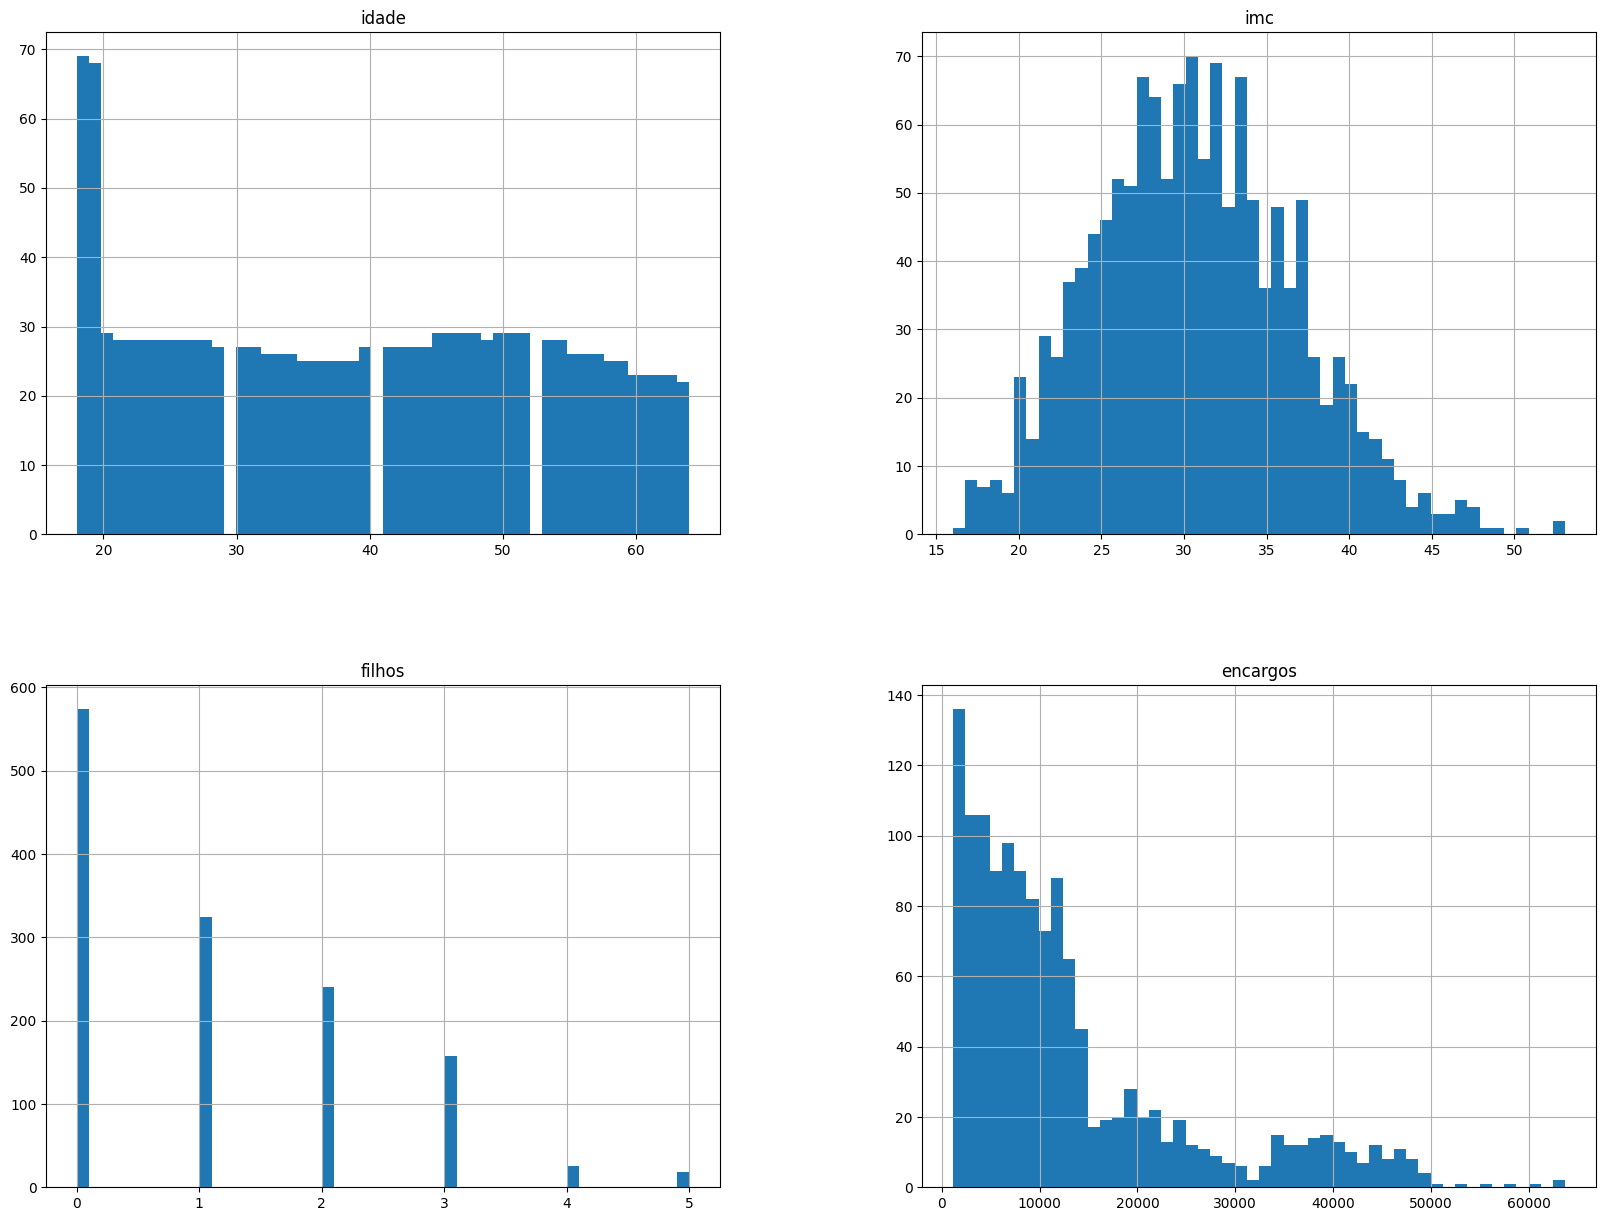

In [15]:
# Distribuição das colunas com histograma
colunas_numericas.hist(bins=50, figsize=(20, 15))

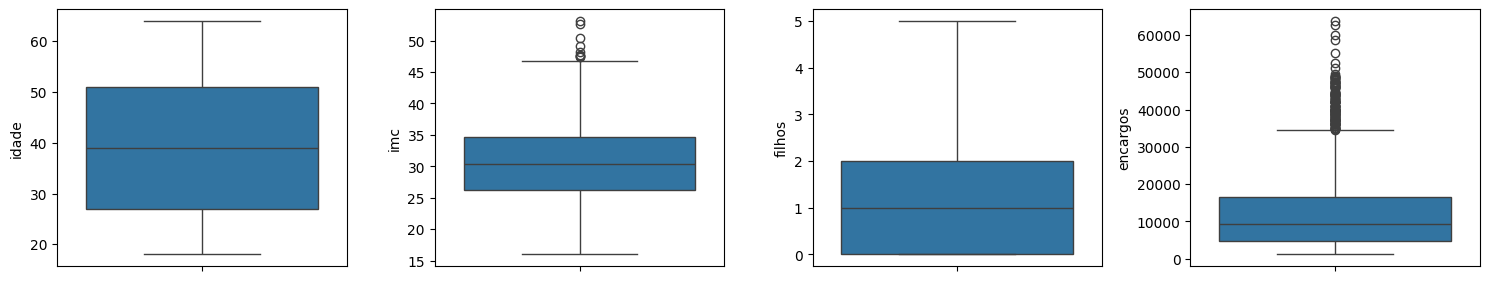

In [16]:
# Distribuição das colunas com boxplot
fig = plt.figure(figsize=(15, 25))

for i in range(len(colunas_numericas.columns)):
    fig.add_subplot(9, 4, i + 1)
    
    sns.boxplot(y=colunas_numericas.iloc[:, i])
    
plt.tight_layout()
plt.show()

Aparentemente minha coluna imc possui outliers acima do imc 47, vamos validar.

In [17]:
Q1 = seguro_saude_df['imc'].quantile(0.25)
Q3 = seguro_saude_df['imc'].quantile(0.75)

IQR = Q3 - Q1

# Definir limites
limite_superior = Q3 + 1.5 * IQR

print(limite_superior)

47.300000000000004


Não vou retirar os outliers por conta da pouca quantidade de dados no dataset atual.

**Explorando as colunas categóricas.**

**Coluna 'gênero'.**

In [18]:
set(seguro_saude_df['gênero'])

{'feminino', 'masculino'}

<Axes: xlabel='gênero', ylabel='count'>

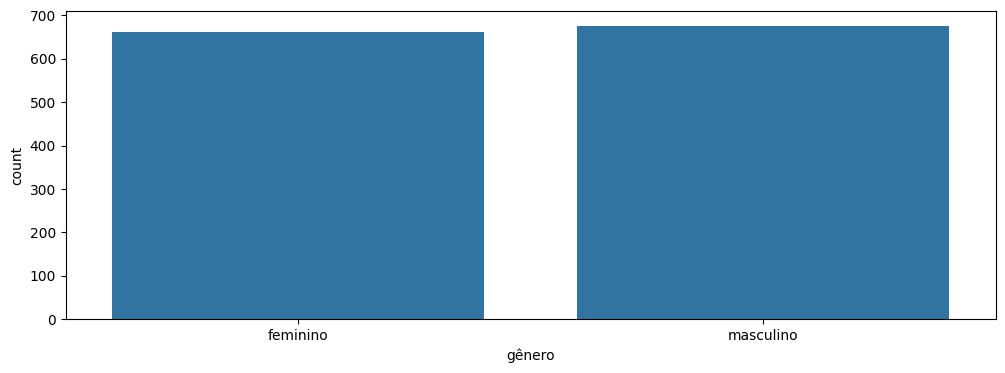

In [19]:
# Validando a frequência da coluna 'gênero'
plt.figure(figsize=(12, 4))

sns.countplot(x='gênero', data=seguro_saude_df)

In [20]:
# Calcular a contagem de frequência de cada categoria
frequencia = seguro_saude_df['gênero'].value_counts()

# Calcular a porcentagem de frequência de cada categoria
porcentagem = (frequencia / len(seguro_saude_df)) * 100
porcentagem = porcentagem.round(2)  # Arredondar para 2 casas decimais

print("\nPorcentagem de cada categoria:")
print(porcentagem)


Porcentagem de cada categoria:
gênero
masculino    50.52
feminino     49.48
Name: count, dtype: float64


Podemos validar que a coluna 'gênero' possui 50.52% masculino e 49.48% feminino.

**Coluna 'fumante'.**

In [21]:
set(seguro_saude_df['fumante'])

{'não', 'sim'}

<Axes: xlabel='fumante', ylabel='count'>

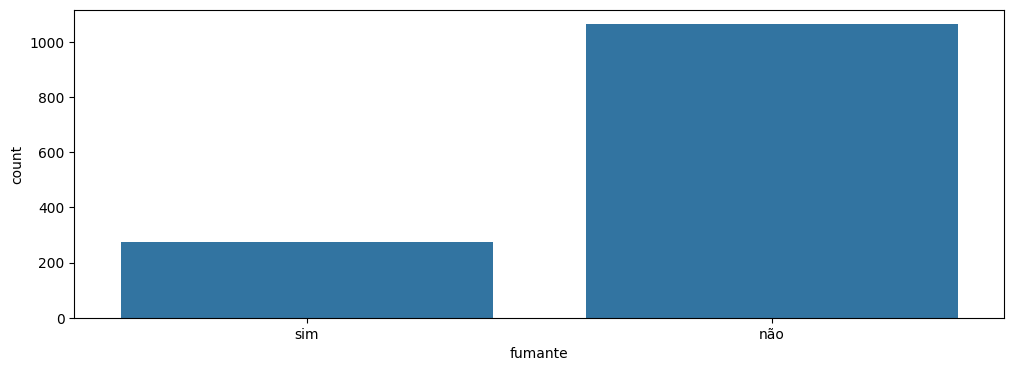

In [22]:
# Validando a frequência da coluna 'fumante'
plt.figure(figsize=(12, 4))

sns.countplot(x='fumante', data=seguro_saude_df)

In [23]:
# Calcular a contagem de frequência de cada categoria
frequencia = seguro_saude_df['fumante'].value_counts()

# Calcular a porcentagem de frequência de cada categoria
porcentagem = (frequencia / len(seguro_saude_df)) * 100
porcentagem = porcentagem.round(2)  # Arredondar para 2 casas decimais

print("\nPorcentagem de cada categoria:")
print(porcentagem)


Porcentagem de cada categoria:
fumante
não    79.52
sim    20.48
Name: count, dtype: float64


Podemos validar que a coluna 'fumante' possui 20.48% de fumantes e 79.52% de não fumantes.

**Coluna 'região'.**

In [24]:
set(seguro_saude_df['região'])

{'nordeste', 'noroeste', 'sudeste', 'sudoeste'}

<Axes: xlabel='região', ylabel='count'>

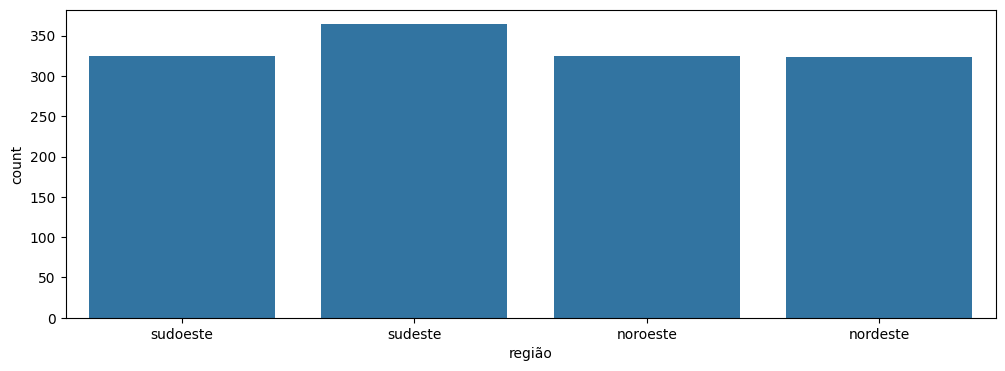

In [25]:
# Validando a frequência da coluna 'região'
plt.figure(figsize=(12, 4))

sns.countplot(x='região', data=seguro_saude_df)

In [26]:
# Calcular a contagem de frequência de cada categoria
frequencia = seguro_saude_df['região'].value_counts()

# Calcular a porcentagem de frequência de cada categoria
porcentagem = (frequencia / len(seguro_saude_df)) * 100
porcentagem = porcentagem.round(2)  # Arredondar para 2 casas decimais

print("\nPorcentagem de cada categoria:")
print(porcentagem)


Porcentagem de cada categoria:
região
sudeste     27.20
sudoeste    24.29
noroeste    24.29
nordeste    24.22
Name: count, dtype: float64


Podemos validar que a coluna 'região' possui 27.20% de pessoas no sudeste, 24.29% no sudoeste, 24.29% no noroeste e 24.22% no nordeste.

Agora que vimos como está nossa distribuição das colunas númericas e categóricas, vamos realizar uma validação da nossa coluna target 'encargos' em relação as outras colunas do dataset.

**Validando os encargos separados por gênero:**

In [27]:
encargos_genero = seguro_saude_df['encargos'].groupby(seguro_saude_df['gênero']).sum().sort_values(ascending=True)
encargos_genero.head()

gênero
feminino     8321061.23
masculino    9434763.96
Name: encargos, dtype: float64

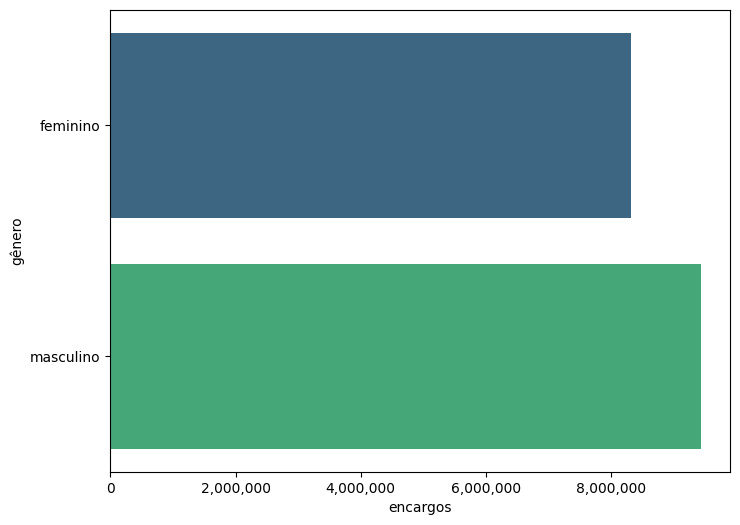

In [28]:
import matplotlib.ticker as ticker

f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x=encargos_genero.head(), y=encargos_genero.head().index, palette='viridis')

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Através do gráfico vemos que as pessoas de gênero masculino possuem o maior total de encargos.

**Validando os encargos separados por fumante:**

In [29]:
encargos_fumante = seguro_saude_df['encargos'].groupby(seguro_saude_df['fumante']).sum().sort_values(ascending=True)
encargos_fumante.head()

fumante
sim    8781763.56
não    8974061.63
Name: encargos, dtype: float64

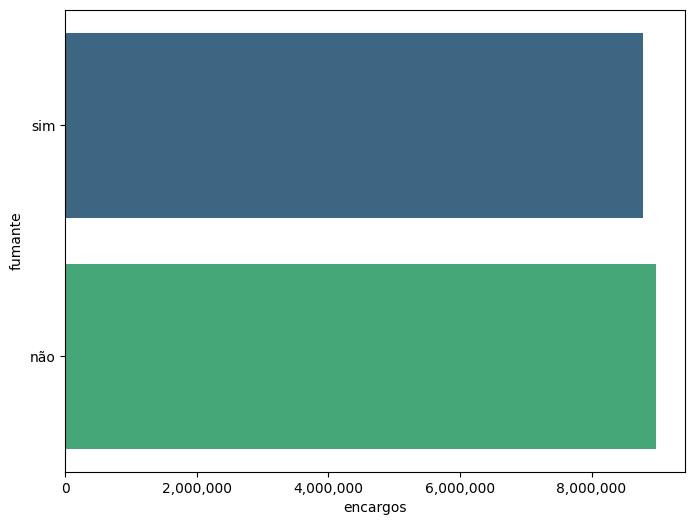

In [30]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x=encargos_fumante.head(), y=encargos_fumante.head().index, palette='viridis')

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Através do gráfico vemos que as pessoas fumantes ou não fumantes possuem praticamente o mesmo total de encargos. Porém, quando analisamos a distribuição da coluna 'fumante', vimos que a quantidade de pessoas não fumantes é 3x maior que a de fumantes.

Então, possivelmente, pessoas que fumam possuem um encargo bem maior que as pessoas que não fumam.

**Validando os encargos separados por região:**

In [31]:
encargos_regiao = seguro_saude_df['encargos'].groupby(seguro_saude_df['região']).sum().sort_values(ascending=True)
encargos_regiao.head()

região
sudoeste    4012754.82
noroeste    4035711.93
nordeste    4343668.64
sudeste     5363689.80
Name: encargos, dtype: float64

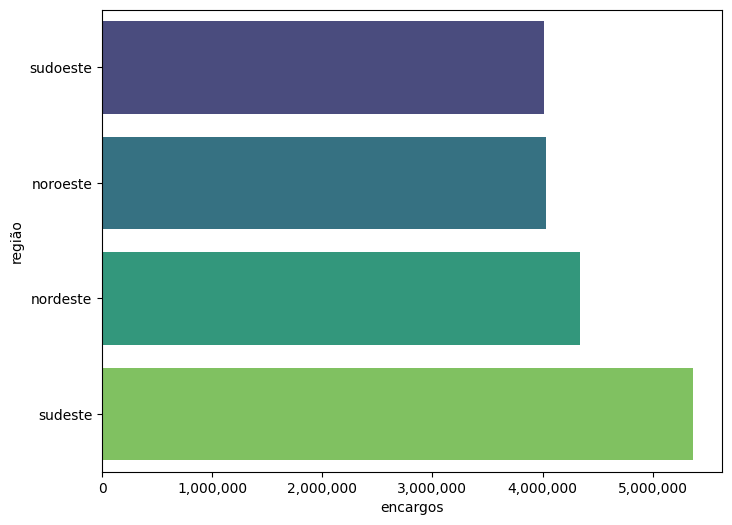

In [32]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x=encargos_regiao.head(), y=encargos_regiao.head().index, palette='viridis')

ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Através do gráfico é possível validar que a região sudeste possue o maior total de encargos entre as 4 regiões.

Levando ainda em consideração as regiões, vamos validar como fica em comparação com as colunas gênero, fumante e filhos:

**Encargos por região e gênero:**

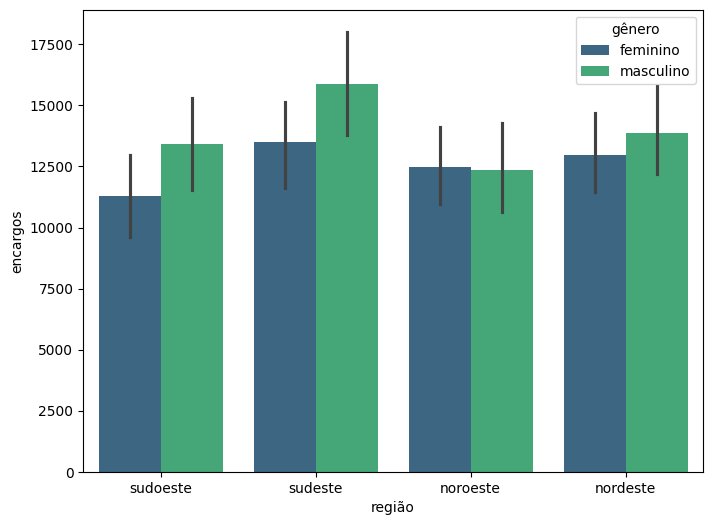

In [33]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))

ax = sns.barplot(x='região', y='encargos', hue='gênero', data=seguro_saude_df, palette='viridis')

Apenas na região noroeste o encargo se equipara entre o gênero feminino e masculino, no restante das regiões o gênero masculino possui o maior valor de encargo.

**Encargos por região e fumante:**

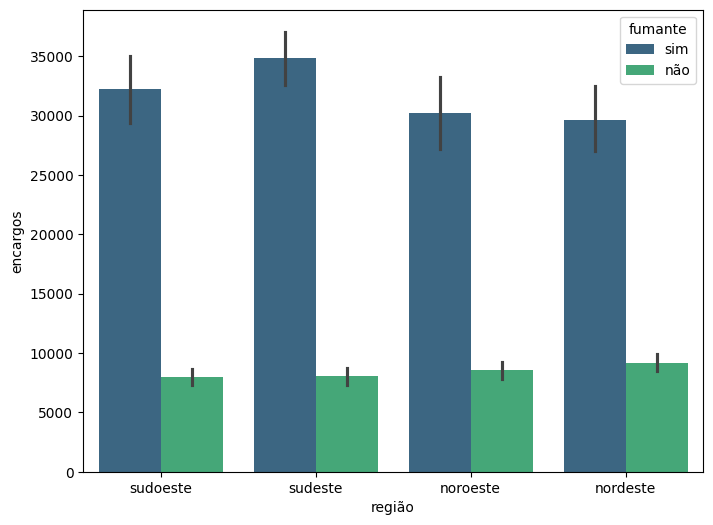

In [34]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x='região', y='encargos', hue='fumante', data=seguro_saude_df, palette='viridis')

Entre todas as regiões parece que uma pessoa fumante possui um valor de encargo maior. Isso confirma o que vimos no gráfico de encargo por fumante.

**Encargos por região e filhos:**

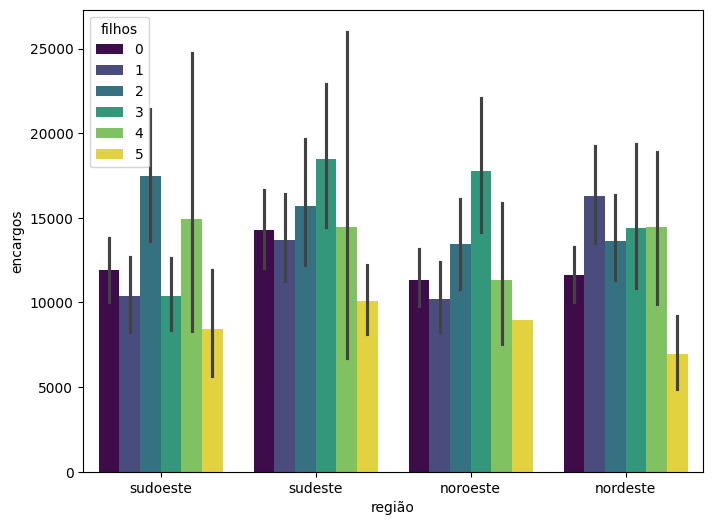

In [35]:
f, ax = plt.subplots(figsize=(8, 6))

ax = sns.barplot(x='região', y='encargos', hue='filhos', data=seguro_saude_df, palette='viridis')

Entre as regiões, em geral, as pessoas que possuem mais de 2 filhos tendem a ter um encargo mais alto.

Como uma pessoa que é fumante apresentou a maior variação de encargo, vamos analisar os encargos pela idade, imc e filhos com o fato de fumar.

**Encargos por fumante e idade**

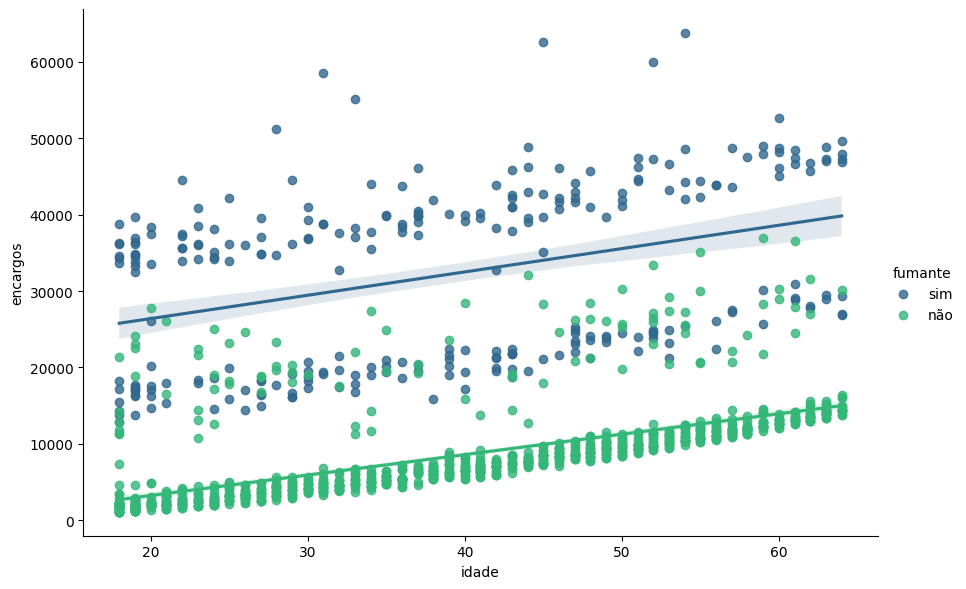

In [36]:
ax = sns.lmplot(x='idade', y='encargos', data=seguro_saude_df, hue='fumante', palette='viridis', height=6, aspect=1.5)

**Encargos por fumante e imc**

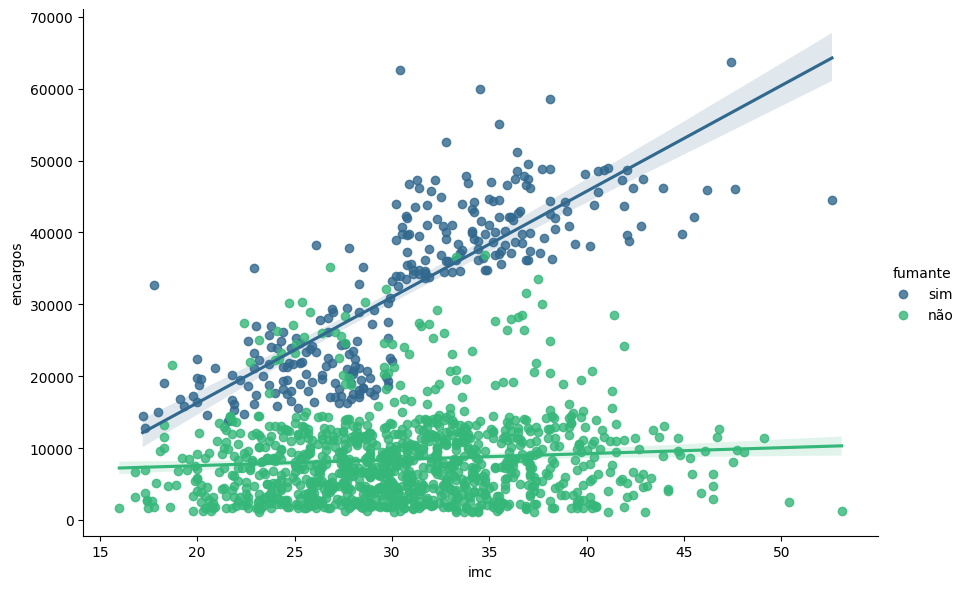

In [37]:
ax = sns.lmplot(x='imc', y='encargos', data=seguro_saude_df, hue='fumante', palette='viridis', height=6, aspect=1.5)

**Encargos por fumante e filhos**

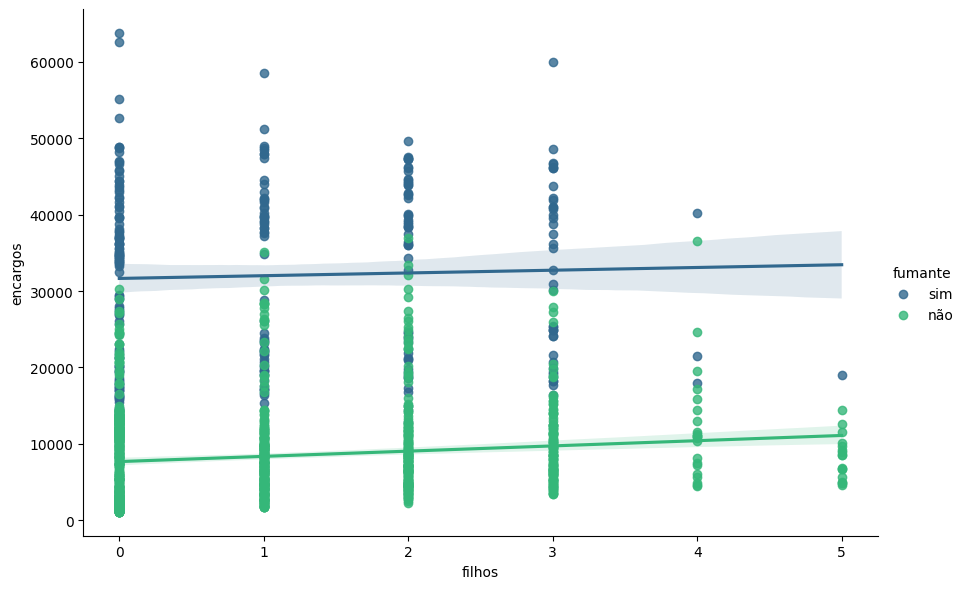

In [38]:
ax = sns.lmplot(x='filhos', y='encargos', data=seguro_saude_df, hue='fumante', palette='viridis', height=6, aspect=1.5)

Através dos gráficos, comparando os encargos de uma pessoa fumante ou não em relação a idade, imc e filhos, é possível validar que, em todos os casos, uma pessoa fumante sempre vai ter um encargo maior.

Com isso parece que nossa coluna fumante pode ser uma possível candidata para uma correlação alta com nossa target 'encargos'. Vamos validar?

**Correlação**

Através das análises gráficas conseguimos ver, inicialmente, que o maior fator para que um encargo seja alto é se a pessoa fuma.

Vamos validar, através de um heatmap, se realmente é isso?

Primeiro vamos transformar nossas colunas categóricas em númericas com o LabelEncoder.

In [39]:
label_encoder = LabelEncoder()

seguro_saude_df_encoded = seguro_saude_df.copy()

for coluna in colunas_categoricas:
    seguro_saude_df_encoded[coluna] = label_encoder.fit_transform(seguro_saude_df_encoded[coluna])

seguro_saude_df_encoded.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


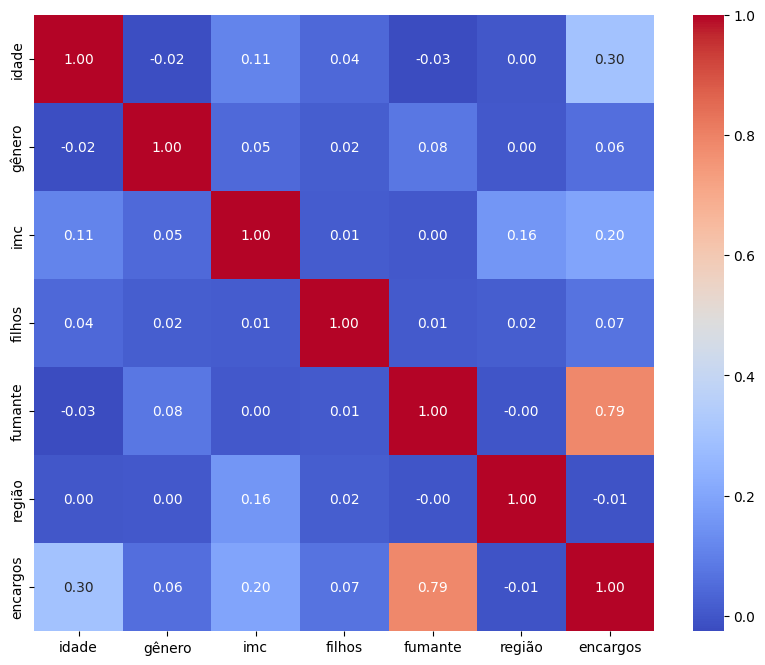

In [40]:
f, ax = plt.subplots(figsize=(10, 8))

ax = sns.heatmap(seguro_saude_df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')

Pelo heatmap vimos que realmente fumante tem uma grande relação com os encargos, porém vamos utilizar o OneHotEncoding para saber se pessoas que fumam ou não fumam possuem essa correlação de 0.79.

In [41]:
seguro_saude_df_dummies = pd.get_dummies(seguro_saude_df, drop_first=True)
seguro_saude_df_dummies.head()

,idade,imc,filhos,encargos,gênero_masculino,fumante_sim,região_noroeste,região_sudeste,região_sudoeste
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False


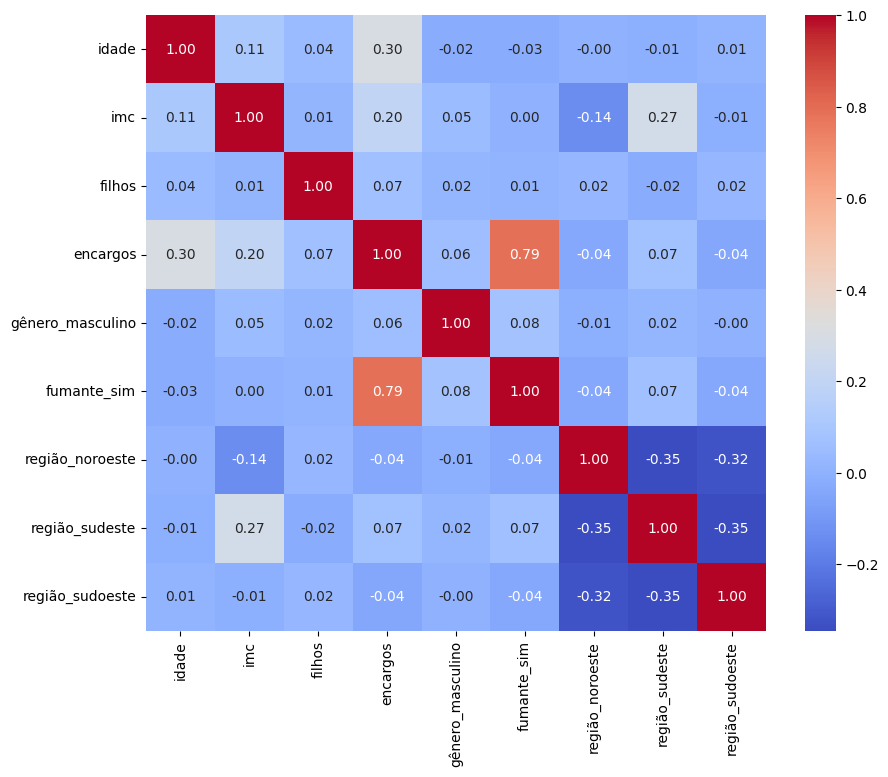

In [42]:
f, ax = plt.subplots(figsize=(10, 8))

ax = sns.heatmap(seguro_saude_df_dummies.corr(), annot=True, fmt='.2f', cmap='coolwarm')

O heatmap aponta exatamente o que vimos nos gráficos, que pessoas fumantes tem uma grande correlação com o valor dos encargos.

Outras correlações que podemos verificar, também, é com idade e imc, apesar de não serem muito altas.

### **Pré-processamento de dados.**

**Separando os dados em treino e teste**

A separação do dataset em teste e treino será da seguinte forma:

- x -> Minhas colunas independentes.
- y -> Minha coluna target.

In [43]:
X = seguro_saude_df.drop('encargos', axis=1)
X.head()

,idade,gênero,imc,filhos,fumante,região
0,19,feminino,27.9,0,sim,sudoeste
1,18,masculino,33.8,1,não,sudeste
2,28,masculino,33.0,3,não,sudeste
3,33,masculino,22.7,0,não,noroeste
4,32,masculino,28.9,0,não,noroeste


In [44]:
y = seguro_saude_df['encargos']
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: encargos, dtype: float64

Vou criar um preprocessor para realizar as seguintes ações:
- **SimpleImputer**: Alterando todos os valores faltantes e nulos pela média da coluna, no caso das colunas númericas, e pelo mais comum, no caso das colunas categóricas.
- **StantardScaler**: Scalonar os valores númericos.
- **OneHotEncoder**: Transformar as colunas categóricas em númericas.

Apesar de nosso dataset não possuir valores faltantes ou nulos vou deixar o SimpleImputer no meu preprocessor.

In [45]:
colunas_numericas = ['idade', 'imc', 'filhos']
colunas_numericas_transf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('StandardScaler', StandardScaler())])

colunas_categoricas = ['gênero', 'fumante', 'região']
colunas_categoricas_transf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num', colunas_numericas_transf, colunas_numericas),
    ('cat', colunas_categoricas_transf, colunas_categoricas)])

Irei deixar 80% do meu dataset para treino e 20% para teste.

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(1070, 6) (268, 6) (1070,) (268,)


Utilizando o meu preprocessor para transformar as bases de teste e treino.

In [47]:
X_treino_preprocessado = preprocessor.fit_transform(X_treino)
X_teste_preprocessado = preprocessor.transform(X_teste)

### **Modelagem.**

**Validando modelos de regressão**

Primeiro vou criar uma função para treinar e retornar as métricas do modelo.

Será utilizado as seguintes métricas:
- MAE (Erro Médio Absoluto)
- MSE (Erro Quadrático Médio)
- RMSE (Raiz Quadrada do Erro Quadrático Médio)
- R2 Score (Coeficiente de Determinação)

In [48]:
def treinar_modelo(modelo, X_treino, y_treino, X_teste, y_teste):
    modelo.fit(X_treino, y_treino)
    
    predicao = modelo.predict(X_teste)
    
    mae = mean_absolute_error(y_teste, predicao)

    mse = mean_squared_error(y_teste, predicao)

    rmse = np.sqrt(mse)

    r2 = r2_score(y_teste, predicao)
    
    return mae, mse, rmse, r2

Vou verificar, utilizando alguns modelos de regressão, como cada um vai se sair nas métricas de predição.

Modelos:
- **Linear Regression**
- **Random Forest Regression**
- **XGBoost**
- **Support Vector Regression**
- **Decision Tree Regression**


In [49]:
comparacao = pd.DataFrame(columns=['MAE', 'MSE', 'RMSE', 'R2'])
comparacao.index.name = 'Modelo'

# Linear Regression
linear_regression = LinearRegression()

lr_mae, lr_mse, lr_rmse, lr_r2 = treinar_modelo(linear_regression, X_treino_preprocessado, y_treino, X_teste_preprocessado, y_teste)

comparacao.loc['Linear Regression'] = [lr_mae, lr_mse, lr_rmse, lr_r2]

# Random Forest
random_forest_regressor = RandomForestRegressor(random_state=42)

rf_mae, rf_mse, rf_rmse, rf_r2 = treinar_modelo(random_forest_regressor, X_treino_preprocessado, y_treino, X_teste_preprocessado, y_teste)

comparacao.loc['Random Forest'] = [rf_mae, rf_mse, rf_rmse, rf_r2]

# XGBoost
xgb_regressor = XGBRegressor(random_state=42)

xgb_mae, xgb_mse, xgb_rmse, xgb_r2 = treinar_modelo(xgb_regressor, X_treino_preprocessado, y_treino, X_teste_preprocessado, y_teste)

comparacao.loc['XGBoost'] = [xgb_mae, xgb_mse, xgb_rmse, xgb_r2]

# Support Vector Regression
svr = SVR()

svr_mae, svr_mse, svr_rmse, svr_r2 = treinar_modelo(svr, X_treino_preprocessado, y_treino, X_teste_preprocessado, y_teste)

comparacao.loc['Support Vector Regression'] = [svr_mae, svr_mse, svr_rmse, svr_r2]

# Decision Tree Regression
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

dt_mae, dt_mse, dt_rmse, dt_r2 = treinar_modelo(decision_tree_regressor, X_treino_preprocessado, y_treino, X_teste_preprocessado, y_teste)

comparacao.loc['Decision Tree Regression'] = [dt_mae, dt_mse, dt_rmse, dt_r2]

In [50]:
comparacao.head()

,MAE,MSE,RMSE,R2
Modelo,,,,
Linear Regression,4179.999366,3.361092e+07,5797.492302,0.783503
Random Forest,2562.995361,2.131351e+07,4616.655711,0.862714
XGBoost,2874.172806,2.455174e+07,4954.971232,0.841855
Support Vector Regression,8605.849729,1.662044e+08,12892.029697,-0.070569
Decision Tree Regression,3269.470597,4.498335e+07,6706.962816,0.710250


Nos testes iniciais o modelo que obteve as melhores métricas é o RandomForest.

Vamos validar, através de um gráfico, o desempenho dos modelos.

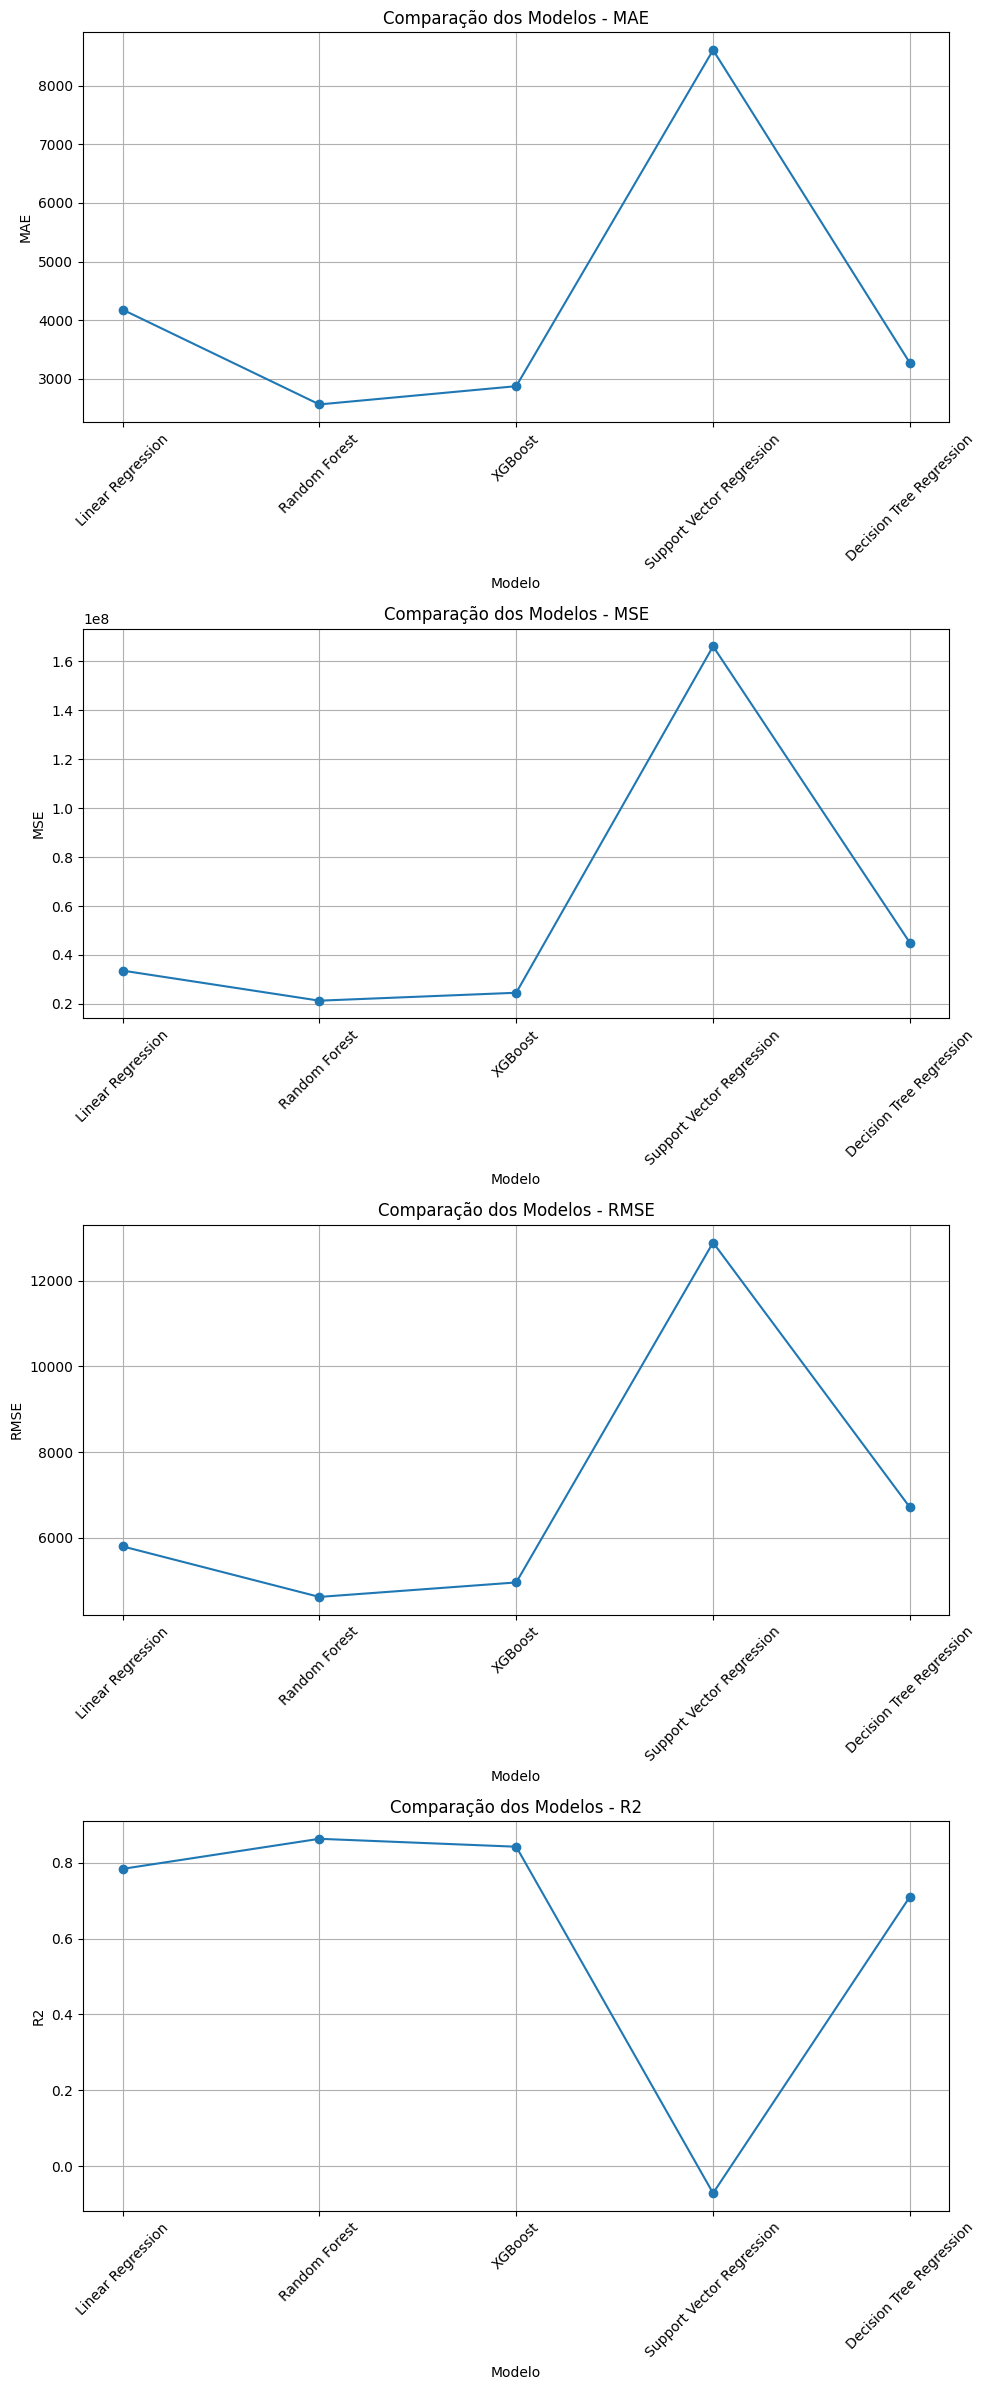

In [51]:
fig, axes = plt.subplots(nrows=len(comparacao.columns), ncols=1, figsize=(10, 6 * len(comparacao.columns)))

for i, coluna in enumerate(comparacao.columns):
    axes[i].plot(comparacao.index, comparacao[coluna], marker='o')
    axes[i].set_title(f'Comparação dos Modelos - {coluna}')
    axes[i].set_xlabel('Modelo')
    axes[i].set_ylabel(coluna)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid()

plt.tight_layout()
plt.show()

Através dos retornos das métricas e também dos gráficos chegamos aos 3 melhores modelos:
- Random Forest
- XGBoost
- Linear Regression

**Validação cruzada**

Utilizando a validação cruzada vou verificar a média e o desvio padrão dos scores:

Primeiro vamos pre-processar o conjunto de dados X.

In [52]:
X_preprocessado = preprocessor.fit_transform(X)

In [53]:
modelos = ['RandomForest', 'XGBoost', 'LinearRegression']

n_folds = 10

validacao_cruzada = pd.DataFrame(columns=['Média', 'Desvio Padrão'])
validacao_cruzada.index.name = 'Modelo'

for modelo in modelos:
    modelo_predicao = None

    if modelo == 'RandomForest':
        modelo_predicao = RandomForestRegressor(random_state=42)
    elif modelo == 'XGBoost':
        modelo_predicao = XGBRegressor(random_state=42)
    elif modelo == 'LinearRegression':
        modelo_predicao = LinearRegression()

    score = cross_val_score(modelo_predicao, X_preprocessado, y, cv=n_folds)

    validacao_cruzada.loc[modelo] = [score.mean(), score.std()]

In [54]:
validacao_cruzada.head()

,Média,Desvio Padrão
Modelo,,
RandomForest,0.836738,0.046597
XGBoost,0.804962,0.054081
LinearRegression,0.743624,0.044909


Vamos validar em um gráfico como ficou os resultados:

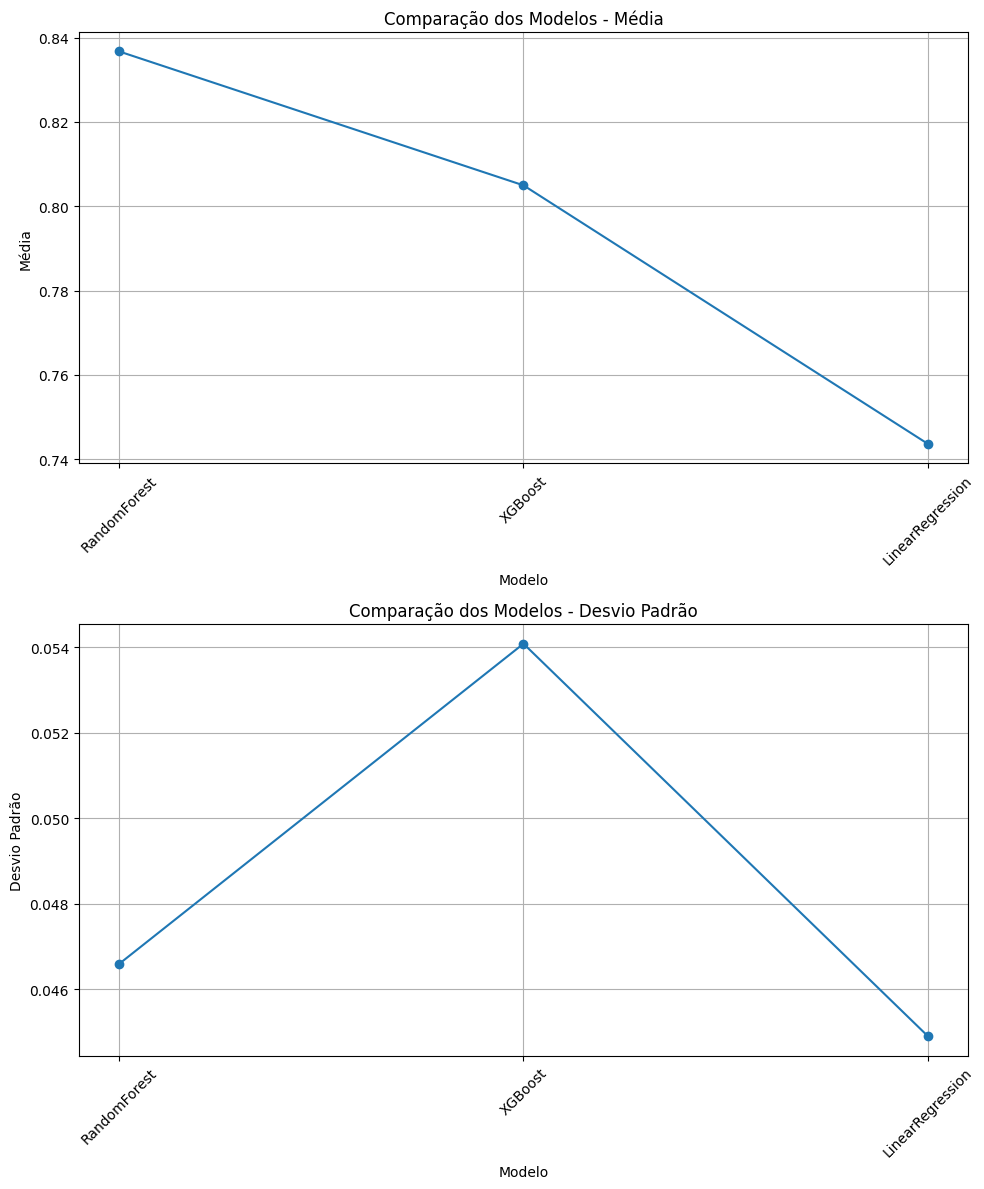

In [55]:
fig, axes = plt.subplots(nrows=len(validacao_cruzada.columns), ncols=1, figsize=(10, 6 * len(validacao_cruzada.columns)))

for i, coluna in enumerate(validacao_cruzada.columns):
    axes[i].plot(validacao_cruzada.index, validacao_cruzada[coluna], marker='o')
    axes[i].set_title(f'Comparação dos Modelos - {coluna}')
    axes[i].set_xlabel('Modelo')
    axes[i].set_ylabel(coluna)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid()

plt.tight_layout()
plt.show()

O Modelo RandomForest apresentou os melhores resultados com uma Média de 0.84 e o Desvio Padrão de 0.46. Com isso ele será utilizado para meu modelo final.

**Ajustes finos no modelo.**

Utilizando o GridSeachCV vamos validar quais são os hiperparâmetros que melhor performam no RandomForest.

In [56]:
modelo_final = RandomForestRegressor()

hiperparam_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(modelo_final, hiperparam_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_preprocessado, y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2')

Verificando quais foram os melhores hiperparâmetros e o melhor R2-Score.

In [57]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [58]:
grid_search.best_score_

0.8502759193106797

Com isso vamos criar nosso modelo final de predição:

In [59]:
modelo_final = RandomForestRegressor(max_depth=10, 
                                     max_features='sqrt', 
                                     min_samples_leaf=2,
                                     min_samples_split=5,
                                     n_estimators=500,
                                     random_state=42)

### **Treinamento e avaliação do modelo.**

O **modelo final** escolhido para o treinamento e avaliação foi o **RandomForest**. Foi o que obteve a melhor performance em todos os testes de comparação realizados acima.

Vamos treinar o nosso modelo final e depois validar como ficou a predição com os dados de teste.

In [60]:
modelo_final.fit(X_treino_preprocessado, y_treino)

modelo_final_pred = modelo_final.predict(X_teste_preprocessado)

modelo_final_mse = mean_squared_error(y_teste, modelo_final_pred)

modelo_final_rmse = np.sqrt(modelo_final_mse)

modelo_final_mae = mean_absolute_error(y_teste, modelo_final_pred)
modelo_final_r2 = r2_score(y_teste, modelo_final_pred)

print(f'RMSE: {modelo_final_rmse}')
print(f'MAE: {modelo_final_mae}')
print(f'R2-Score: {modelo_final_r2}')

RMSE: 4554.64856168717
MAE: 2697.873406175001
R2-Score: 0.8663768584614902


Criando o Pipeline com o preprocessamento e o modelo final.

In [61]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', modelo_final)])

Testando meu pipeline:

In [62]:
pipeline.fit(X_treino, y_treino)

predicao = pipeline.predict(X_teste)

Gravando minhas predições em um arquivo csv:

In [63]:
arquivo_predicao = pd.DataFrame({'encargos_teste': y_teste,
                                 'encargos_predicao': predicao})

arquivo_predicao.to_csv('..\Base de Dados\encargos_preditos.csv', index=False)

### **Validação estatística.**

Utilizando a validação cruzada para verificar a média e o desvio padrão do meu modelo final.

In [64]:
# Validação cruzada
score_final = cross_val_score(pipeline, X, y, cv=10)

media_score_final = score_final.mean()
desvio_padrao_score_final = score_final.std()

print(f'Média: {media_score_final}')
print(f'Desvio Padrão: {desvio_padrao_score_final}')

Média: 0.8494163594061345
Desvio Padrão: 0.03891458417813969


Verificando através de um gráfico scatter como ficou a relação entre os valores reais e as predições.

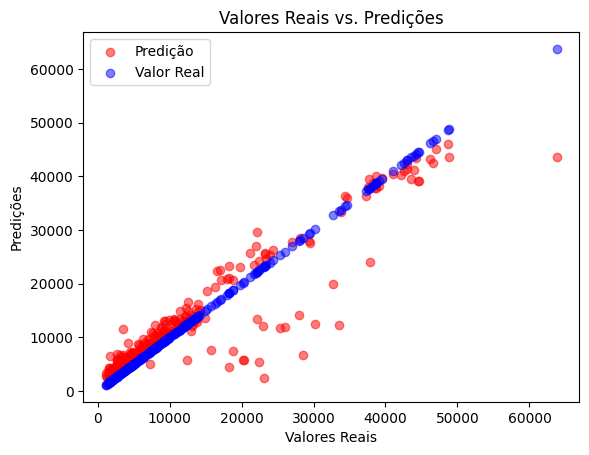

In [65]:
plt.scatter(y_teste, predicao, color='red', alpha=0.5, label='Predição')
plt.scatter(y_teste, y_teste, color='blue', alpha=0.5, label='Valor Real')
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Valores Reais vs. Predições')
plt.legend()
plt.show()

### **Conclusão.**

Após toda a análise realizada acima dos dados de seguro saúde, foram encontrados correlações significativas entre certos fatores associados aos encargos. Descobrimos que o hábito de fumar é o fator com maior relevância no valor de um seguro saúde (0,79), os gráficos também ajudaram a confirmar essa tendência entre fumantes. Além disto, foi possível observar que a idade e o imc podem ter algum impacto no valor porém não tão grande (0,30).

Entre todos os modelos de regressão identifiquei que o modelo que melhor performou com este dataset foi o modelo RandomForest que apresentou um média de precisão de cerca de 85%, o gráfico entre os valores Reais vs. Predições pode confirmar essa precisão. Assim o RandomForest foi escolhido como meu modelo final para as previsões.

As descobertas acima ressaltam o quão importante é considerar o hábito de fumar ao determinar o custo de um seguro de vida para uma pessoa e, também, como os modelos de machine learning podem ajudar a prever esses valores com precisão.